In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Dataset

In [141]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [19]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
dataset.shape

(1599, 12)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
#Checking for NULL values.

In [24]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
#As there is no missing values (NaN)(VALUES IN DATA SET WE CAN PROCEED FURTHER)

In [29]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [31]:
# FROM ABOVE DATA WE CAN DO PREDICTION BETTER THROUGH HISTOGRAM GRAPHS .

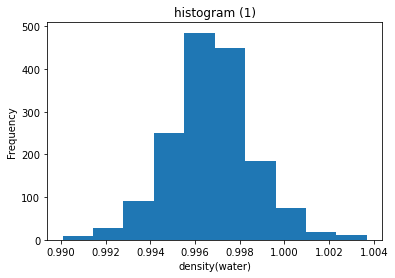

In [32]:
d = dataset['density']
bins = 10


plt.hist(d,bins)
plt.title("histogram (1)")
plt.xlabel("density(water)")
plt.ylabel("Frequency")
plt.show()

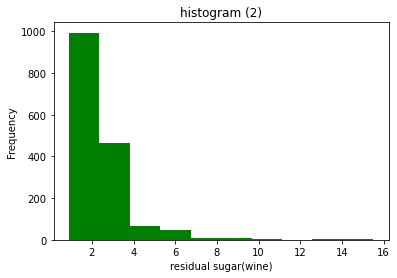

In [33]:
r = dataset['residual sugar']
bins = 10


plt.hist(r,bins,color = "green")
plt.title("histogram (2)")
plt.xlabel("residual sugar(wine)")
plt.ylabel("Frequency")
plt.show()

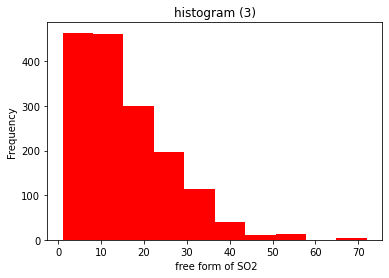

In [34]:
fsd = dataset['free sulfur dioxide']
bins = 10


plt.hist(fsd,bins,color = "red")
plt.title("histogram (3)")
plt.xlabel(" free form of SO2")
plt.ylabel("Frequency")
plt.show()

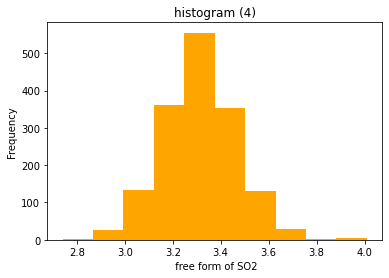

In [37]:
ph = dataset['pH']
bins = 10


plt.hist(ph,bins,color = "orange")
plt.title("histogram (4)")
plt.xlabel(" free form of SO2")
plt.ylabel("Frequency")
plt.show()

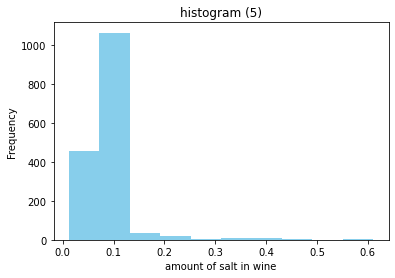

In [50]:
cl = dataset['chlorides']
bins = 10


plt.hist(cl,bins,color = "skyblue")
plt.title("histogram (5)")
plt.xlabel("amount of salt in wine")
plt.ylabel("Frequency")
plt.show()

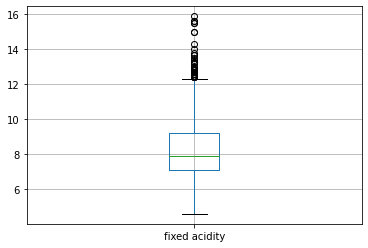

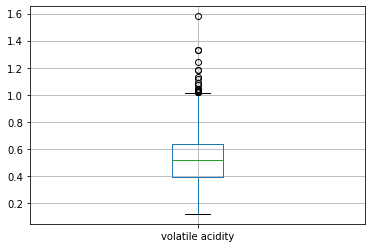

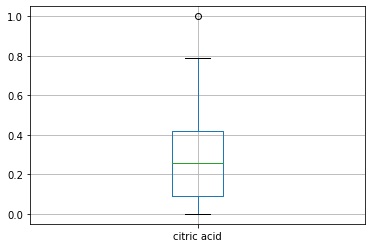

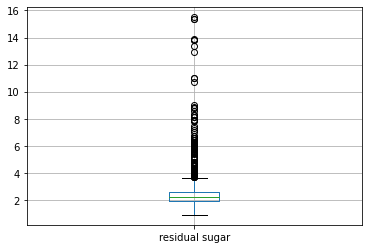

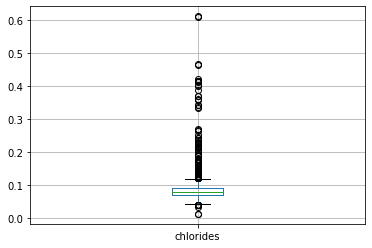

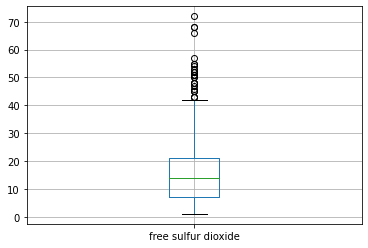

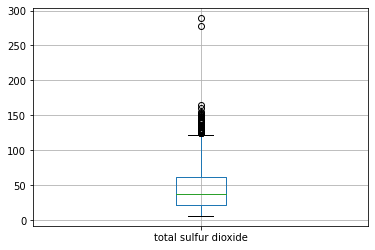

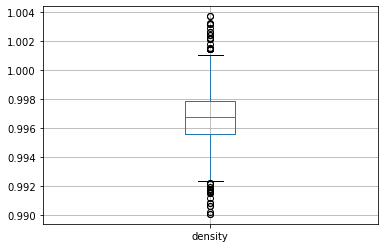

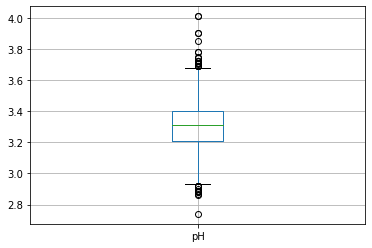

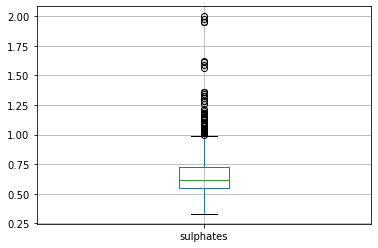

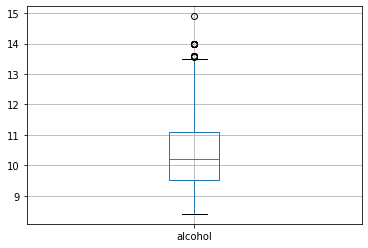

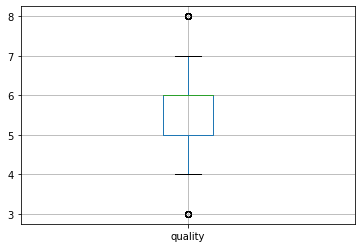

In [51]:
for cl in dataset:
    plt.figure()
    dataset.boxplot([cl])

In [52]:
#scatter plot using matplotlib


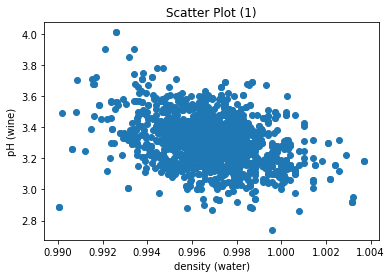

In [53]:
d = dataset["density"]
ph = dataset["pH"]

plt.scatter(d, ph)
plt.title("Scatter Plot (1)")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

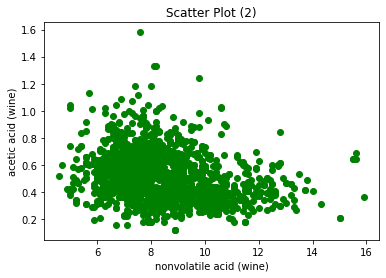

In [54]:
fa = dataset["fixed acidity"] (#fa is term used for fixacidity)
va = dataset["volatile acidity"]

plt.scatter(fa, va,color = 'green')
plt.title("Scatter Plot (2)")
plt.xlabel("nonvolatile acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()


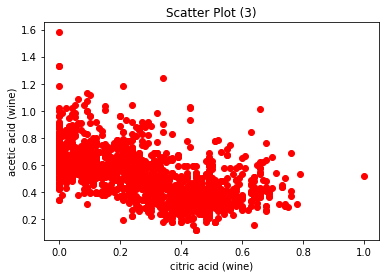

In [61]:
ca = dataset["citric acid"]
va = dataset["volatile acidity"]

plt.scatter(ca, va,color = 'red')
plt.title("Scatter Plot (3)")
plt.xlabel("citric acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

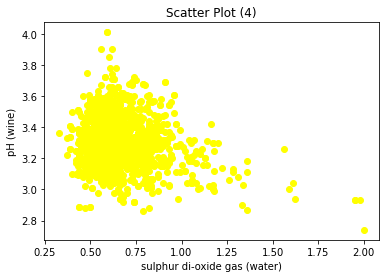

In [62]:
sl = dataset["sulphates"]
ph = dataset["pH"]

plt.scatter(sl, ph,color = 'yellow')
plt.title("Scatter Plot (4)")
plt.xlabel("sulphur di-oxide gas (water)")
plt.ylabel("pH (wine)")
plt.show()

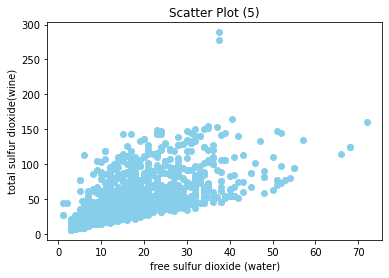

In [63]:
fsd = dataset["free sulfur dioxide"]
tsd = dataset["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'skyblue')
plt.title("Scatter Plot (5)")
plt.xlabel("free sulfur dioxide (water)")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

[]

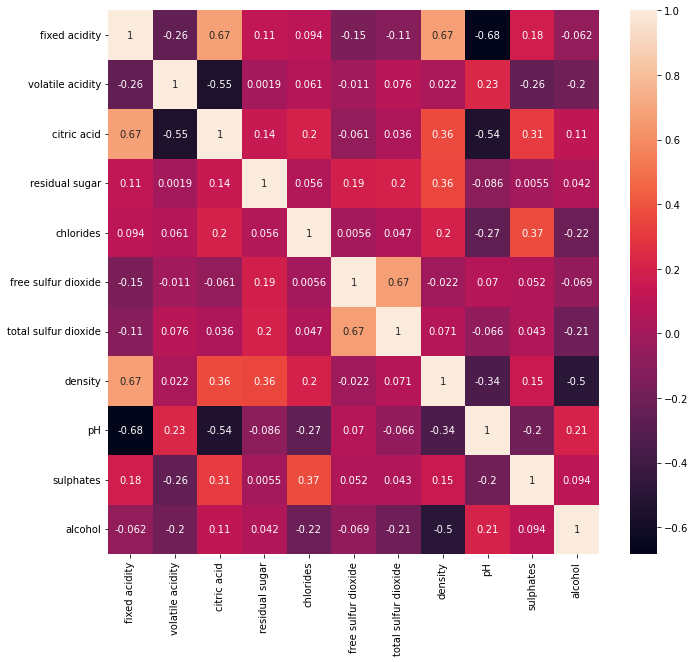

In [134]:
plt.figure(figsize = (11,10))
data = x.corr()
sns.heatmap(data, annot = True)
plt.plot()

In [64]:
# Modelling the Data

In [66]:
#to examine the quality of wine i had took some features such as:,
#citric acid' , 'alcohol' , 'residual sugar' , 'pH' , 'total sulfur dioxide'


In [67]:
features = ['citric acid','alcohol','residual sugar','pH','total sulfur dioxide']  #input values

x = dataset[features]
y = dataset['quality'] 

In [68]:
# for data i will import some important librarires 

In [69]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y= le.fit_transform(y)

In [70]:
# firstly i will split the data.

In [71]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10 , random_state=3,shuffle=True)

In [72]:
s_c = StandardScaler()
train_x=s_c.fit_transform(train_x)
test_x=s_c.fit_transform(test_x)

In [73]:
Knn = KNeighborsClassifier (n_neighbors=7,p=1)
Knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7, p=1)

In [74]:
y_pred=Knn.predict(test_x)
y_pred

array([2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4,
       3, 3, 2, 4, 3, 2, 2, 2, 4, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 2, 2, 5,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1,
       3, 2, 4, 3, 2, 2, 3, 2, 3, 4, 2, 2, 3, 2, 2, 3, 3, 3, 2, 4, 2, 3,
       3, 2, 3, 3, 3, 2, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 2, 2, 1], dtype=int64)

In [75]:
test_y

array([2, 1, 3, 4, 1, 3, 1, 5, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 4, 3, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 4, 2, 2, 3, 2, 2, 4, 1, 2, 4, 3,
       2, 4, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 3, 3,
       3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2,
       3, 3, 3, 3, 4, 2, 2, 3, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 1, 2, 3, 4,
       3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 4, 2, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 2, 2, 4, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 2, 1], dtype=int64)

In [77]:
# confusion matrix

In [76]:
c_m = confusion_matrix(test_y,y_pred)
c_m

array([[ 1,  6,  2,  1,  0],
       [ 0, 52, 13,  1,  1],
       [ 0, 20, 43,  6,  0],
       [ 1,  2,  8,  2,  0],
       [ 0,  0,  1,  0,  0]], dtype=int64)

In [78]:
# accuracy of the dataset

In [79]:
print("Wrong values predicted out of total values : ")
print((test_y!=y_pred).sum(),'/',((test_y==y_pred).sum()+(test_y!=y_pred).sum()))

Wrong values predicted out of total values : 
62 / 160


In [80]:
print('percentage Accuracy using KNN is : ',100*accuracy_score(test_y,y_pred))

percentage Accuracy using KNN is :  61.25000000000001


In [81]:
# different types for measuring accuracy

In [82]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [83]:
# Creating 3 classes based on quality <= 4 , low; quality > 4 <= 8, medium else high
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "low quality wine"
    elif x > 5 and x < 7:
        x = "medium quality wine"
    else:
        x = "high quality wine"
    return x

In [86]:
dataset['level']=dataset['quality'].apply(lambda x:create_level(x) )

In [107]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,level
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low quality wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low quality wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low quality wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium quality wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low quality wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low quality wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium quality wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium quality wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low quality wine


In [119]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality.
# quality less than (6.5) labeled as bad and higher labeled as good.
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)

In [120]:
# Bad becomes 0 and good becomes 1 :

In [121]:
dataset['quality'] = dataset['quality'].map({'bad' : 0, 'good' : 1})

In [122]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [123]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,low quality wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,low quality wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,low quality wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,medium quality wine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,low quality wine


In [ ]:
#physiochemical properties make a wine 'good'!
#as per data and visualisation all the factors make a contribution for good quality wines as per our data we are only predecting as,
#actual data of many things are missing. still we are predicting the same.